# RGB model

In [1]:
import pandas as pd
FILE = "rgb4.csv"
RGB4 = pd.read_csv(FILE)
FILE = "rgb12.csv"
RGB12 = pd.read_csv(FILE)
#stype = pd.get_dummies(RGB4['type'],drop_first=True)
#RGB4.drop(['type'],axis = 1, inplace = True)
#RGB4 = pd.concat([RGB4,stype], axis =1)
#RGB4.iloc[:, 0:4]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(RGB4.iloc[:, 0:3],RGB4.iloc[:, 3:] , test_size=0.25, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(RGB12.iloc[:, 0:3],RGB12.iloc[:, 3:] , test_size=0.25, random_state=0)

## Logistic Regression (linear)

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', max_iter = 1000)
clf.fit(x_train, y_train.values.ravel())

#clf.predict(x_test[0:10])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.3795918367346939 0.4009070294784581


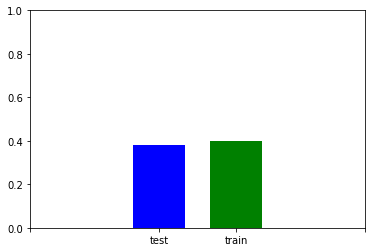

In [3]:
testscore1 = []
trainscore1 = []

tst_sc = clf.score(x_test, y_test)
trn_sc = clf.score(x_train,y_train)

testscore1.append(tst_sc)
trainscore1.append(trn_sc)

print(tst_sc, trn_sc)

fig, ax = plt.subplots()
plt.bar([1], tst_sc, color='b', width = 0.20)
plt.bar([1.30], trn_sc, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks([.5,1,1.30,1.8], ('','test', 'train',''))
plt.show()

## Neural Net (non-linear)

In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,20,100), random_state=1)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

clf.fit(x_train, y_train.values.ravel())

tst_sc = clf.score(x_test, y_test)
trn_sc = clf.score(x_train,y_train)

testscore1.append(tst_sc)
trainscore1.append(trn_sc)

print(tst_sc, trn_sc)

0.5170068027210885 0.5836734693877551


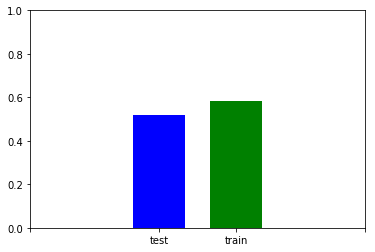

In [5]:
fig, ax = plt.subplots()
plt.bar([1], tst_sc, color='b', width = 0.20)
plt.bar([1.30], trn_sc, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks([.5,1,1.30,1.8], ('','test', 'train',''))
plt.show()

## Everything 

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Nearest Neighbors 0.48299319727891155 0.6448979591836734
Linear SVM 0.38503401360544215 0.400453514739229
RBF SVM 0.49115646258503404 0.5569160997732426
Decision Tree 0.4272108843537415 0.4839002267573696
Random Forest 0.454421768707483 0.5011337868480725
AdaBoost 0.4204081632653061 0.455328798185941
Naive Bayes 0.4 0.4031746031746032
QDA 0.4312925170068027 0.4453514739229025


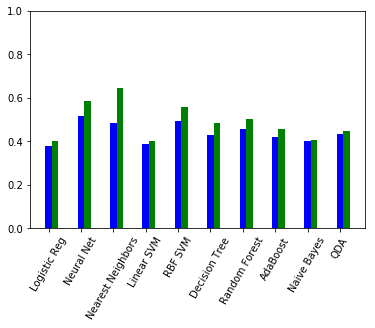

In [7]:
names = ["Logistic Reg", "Neural Net", "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
# names = ["Logistic Reg", "Neural Net", "Nearest Neighbors", "Linear SVM", "RBF SVM",
#          "Decision Tree", "Random Forest", "AdaBoost",
#          "Naive Bayes", "QDA", "Gaussian Proc"]
# classifiers = [
#     KNeighborsClassifier(5),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
#     GaussianProcessClassifier()]

for name, clf in zip(names[2:], classifiers):
    clf.fit(x_train, y_train.values.ravel())
    tst_sc = clf.score(x_test, y_test)
    trn_sc = clf.score(x_train, y_train)
    print(name, tst_sc,trn_sc)
    testscore1.append(tst_sc)
    trainscore1.append(trn_sc)

fig, ax = plt.subplots()
bar_width = .2
index = range(len(names))
plt.bar(index, testscore1, color='b', width = 0.20)
plt.bar([ind+bar_width for ind in index], trainscore1, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks(index, names,rotation=60)
plt.show()

# CMYK Model

In [11]:
import pandas as pd
FILE = "cmyk4.csv"
CMYK4 = pd.read_csv(FILE)
FILE = "cmyk12.csv"
CMYK12 = pd.read_csv(FILE)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(CMYK4.iloc[:, 0:4],CMYK4.iloc[:, 4:] , test_size=0.25, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(CMYK12.iloc[:, 0:4],CMYK12.iloc[:, 4:] , test_size=0.25, random_state=0)

## Logistic Regression - linear

0.44761904761904764 0.4417233560090703


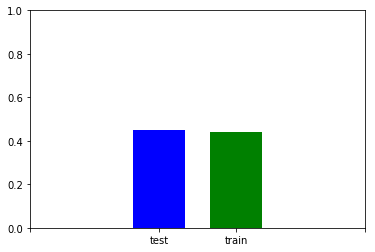

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter = 10000)
clf.fit(x_train, y_train.values.ravel())

#clf.predict(x_test[0:10])

testscore2 = []
trainscore2 = []

tst_sc = clf.score(x_test, y_test)
trn_sc = clf.score(x_train,y_train)

testscore2.append(tst_sc)
trainscore2.append(trn_sc)

print(tst_sc, trn_sc)

fig, ax = plt.subplots()
plt.bar([1], tst_sc, color='b', width = 0.20)
plt.bar([1.30], trn_sc, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks([.5,1,1.30,1.8], ('','test', 'train',''))
plt.show()

## Neural Net - non-linear

0.5197278911564626 0.6208616780045352


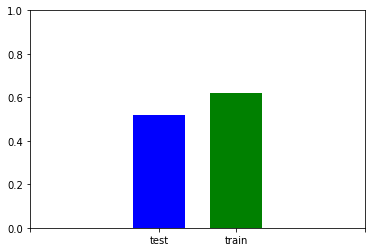

In [13]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,20,20), random_state=1)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

clf.fit(x_train, y_train.values.ravel())

tst_sc = clf.score(x_test, y_test)
trn_sc = clf.score(x_train,y_train)

testscore2.append(tst_sc)
trainscore2.append(trn_sc)

print(tst_sc, trn_sc)

fig, ax = plt.subplots()
plt.bar([1], tst_sc, color='b', width = 0.20)
plt.bar([1.30], trn_sc, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks([.5,1,1.30,1.8], ('','test', 'train',''))
plt.show()

## Everything

Nearest Neighbors 0.46530612244897956 0.6390022675736962
Linear SVM 0.4435374149659864 0.42585034013605444
RBF SVM 0.4884353741496599 0.6018140589569161
Decision Tree 0.4598639455782313 0.49523809523809526
Random Forest 0.4666666666666667 0.5151927437641723
AdaBoost 0.4163265306122449 0.4507936507936508
Naive Bayes 0.4435374149659864 0.4512471655328798
QDA 0.45034013605442175 0.46077097505668935


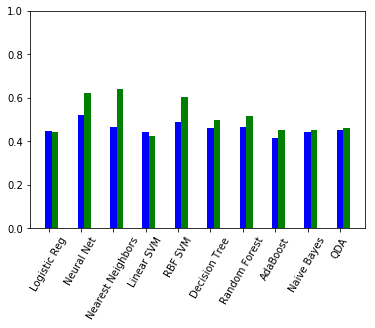

In [14]:
for name, clf in zip(names[2:], classifiers):
    clf.fit(x_train, y_train.values.ravel())
    tst_sc = clf.score(x_test, y_test)
    trn_sc = clf.score(x_train, y_train)
    print(name, tst_sc,trn_sc)
    testscore2.append(tst_sc)
    trainscore2.append(trn_sc)

fig, ax = plt.subplots()
bar_width = .2
index = range(len(names))
plt.bar(index, testscore2, color='b', width = 0.20)
plt.bar([ind+bar_width for ind in index], trainscore2, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks(index, names,rotation=60)
plt.show()

# HSV model

In [15]:
FILE = "hsv4.csv"
HSV4 = pd.read_csv(FILE)
FILE = "hsv12.csv"
HSV12 = pd.read_csv(FILE)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(HSV4.iloc[:, 0:3],HSV4.iloc[:, 3:] , test_size=0.25, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(HSV12.iloc[:, 0:3],HSV12.iloc[:, 3:] , test_size=0.25, random_state=0)

## Logistic Regression - linear

0.4 0.41723356009070295


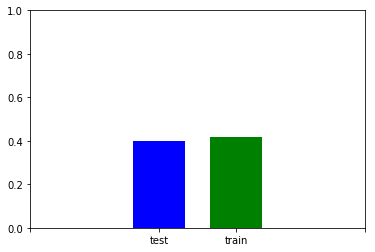

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter = 1000)
clf.fit(x_train, y_train.values.ravel())

#clf.predict(x_test[0:10])

testscore = []
trainscore = []

tst_sc = clf.score(x_test, y_test)
trn_sc = clf.score(x_train,y_train)

testscore.append(tst_sc)
trainscore.append(trn_sc)

print(tst_sc, trn_sc)

fig, ax = plt.subplots()
plt.bar([1], tst_sc, color='b', width = 0.20)
plt.bar([1.30], trn_sc, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks([.5,1,1.30,1.8], ('','test', 'train',''))
plt.show()

## Neural Net - non-linear

0.48027210884353744 0.5804988662131519


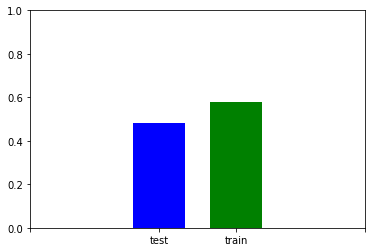

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,100,20), random_state=1)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

clf.fit(x_train, y_train.values.ravel())

tst_sc = clf.score(x_test, y_test)
trn_sc = clf.score(x_train,y_train)

testscore.append(tst_sc)
trainscore.append(trn_sc)

print(tst_sc, trn_sc)

fig, ax = plt.subplots()
plt.bar([1], tst_sc, color='b', width = 0.20)
plt.bar([1.30], trn_sc, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks([.5,1,1.30,1.8], ('','test', 'train',''))
plt.show()

## Everything

Nearest Neighbors 0.47891156462585033 0.6480725623582766
Linear SVM 0.38639455782312926 0.4145124716553288
RBF SVM 0.4775510204081633 0.5569160997732426
Decision Tree 0.47346938775510206 0.5165532879818594
Random Forest 0.46938775510204084 0.5501133786848073
AdaBoost 0.4557823129251701 0.48435374149659866
Naive Bayes 0.3986394557823129 0.4453514739229025
QDA 0.39727891156462586 0.43492063492063493


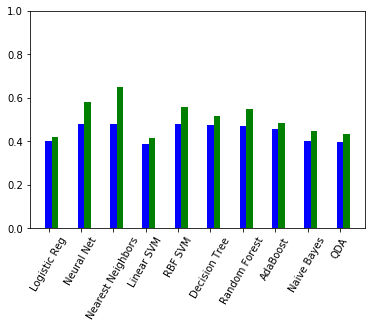

In [18]:
for name, clf in zip(names[2:], classifiers):
    clf.fit(x_train, y_train.values.ravel())
    tst_sc = clf.score(x_test, y_test)
    trn_sc = clf.score(x_train, y_train)
    print(name, tst_sc,trn_sc)
    testscore.append(tst_sc)
    trainscore.append(trn_sc)
    
fig, ax = plt.subplots()
bar_width = .2
index = range(len(names))
plt.bar(index, testscore, color='b', width = 0.20)
plt.bar([ind+bar_width for ind in index], trainscore, color='g', width = 0.2)
plt.ylim(top=1)
plt.xticks(index, names,rotation=60)
plt.show()

# Comparison - RGB/CMYK/HSV

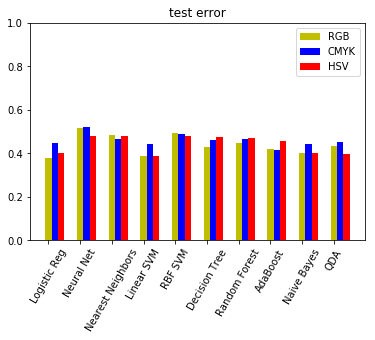

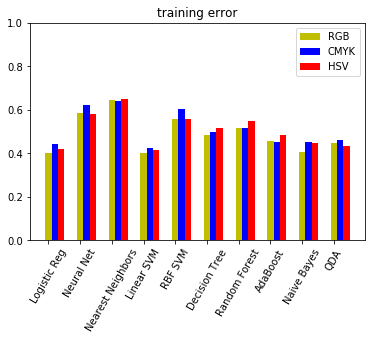

In [19]:
fig, ax = plt.subplots()
bar_width = .2
index = range(len(names))
plt.bar(index, testscore1, color='y', width = 0.20, label='RGB')
plt.bar([ind+bar_width for ind in index], testscore2, color='b', width = 0.2, label = 'CMYK')
plt.bar([ind+2*bar_width for ind in index], testscore, color='r', width = 0.2, label = 'HSV')
plt.ylim(top=1)
plt.xticks(index, names,rotation=60)
plt.legend()
plt.title('test error')
plt.show()

fig, ax = plt.subplots()
bar_width = .2
index = range(len(names))
plt.bar(index, trainscore1, color='y', width = 0.20, label='RGB')
plt.bar([ind+bar_width for ind in index], trainscore2, color='b', width = 0.2, label = 'CMYK')
plt.bar([ind+2*bar_width for ind in index], trainscore, color='r', width = 0.2, label = 'HSV')
plt.ylim(top=1)
plt.xticks(index, names,rotation=60)
plt.legend()
plt.title('training error')
plt.show()